In [1]:
import numpy as np
import math
import csv
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib
import random
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from scipy import stats


In [2]:
###Загружаємо дані
test_set = pd.read_csv('test.csv')
train_set = pd.read_csv('train.csv')

In [3]:
#Видаляємо ідентифікацію колонок
train_set.drop('ID_code', axis='columns', inplace=True)
ID_code_test = test_set['ID_code']
test_set.drop('ID_code', axis='columns', inplace=True)

In [4]:
train_set.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 201 columns]

In [5]:
train_set.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [6]:
#Перевіряємо типи вхідних даних
print(train_set.dtypes.unique())
print(test_set.dtypes.unique())

[dtype('int64') dtype('float64')]
[dtype('float64')]


In [7]:
def missing_value_count(train_set):
    rows,N = train_set.shape
    missing_value = train_set.isnull().sum()
    for i in range(N):
        if missing_value[i] > 0:
            miss_persent = missing_value[i]/rows*100
            print(i,missing_value[i],f":\t %.2f" % miss_persent,"% \t",train_set.columns[i])
    
    print(train_set.shape)

In [8]:
missing_value_count(train_set)

(200000, 201)


In [9]:
missing_value_count(test_set)

(200000, 200)


array([[<AxesSubplot:title={'center':'target'}>,
        <AxesSubplot:title={'center':'var_0'}>,
        <AxesSubplot:title={'center':'var_1'}>,
        <AxesSubplot:title={'center':'var_2'}>,
        <AxesSubplot:title={'center':'var_3'}>,
        <AxesSubplot:title={'center':'var_4'}>,
        <AxesSubplot:title={'center':'var_5'}>,
        <AxesSubplot:title={'center':'var_6'}>,
        <AxesSubplot:title={'center':'var_7'}>,
        <AxesSubplot:title={'center':'var_8'}>,
        <AxesSubplot:title={'center':'var_9'}>,
        <AxesSubplot:title={'center':'var_10'}>,
        <AxesSubplot:title={'center':'var_11'}>,
        <AxesSubplot:title={'center':'var_12'}>],
       [<AxesSubplot:title={'center':'var_13'}>,
        <AxesSubplot:title={'center':'var_14'}>,
        <AxesSubplot:title={'center':'var_15'}>,
        <AxesSubplot:title={'center':'var_16'}>,
        <AxesSubplot:title={'center':'var_17'}>,
        <AxesSubplot:title={'center':'var_18'}>,
        <AxesSubplot:title={'

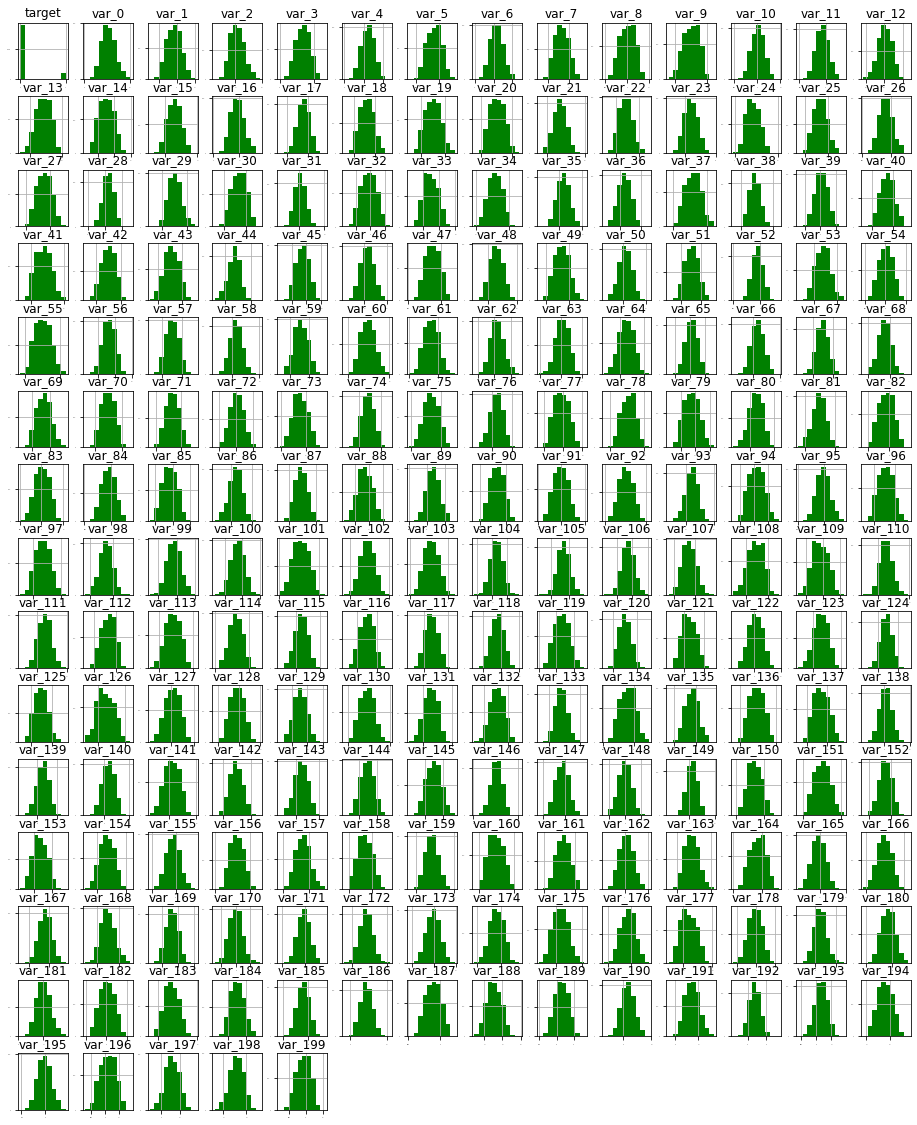

In [10]:
#Візуалізуємо дані
features = list(train_set.columns)
train_set[features].hist(figsize=(16,20),color = 'g',xlabelsize=0,ylabelsize=0)

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

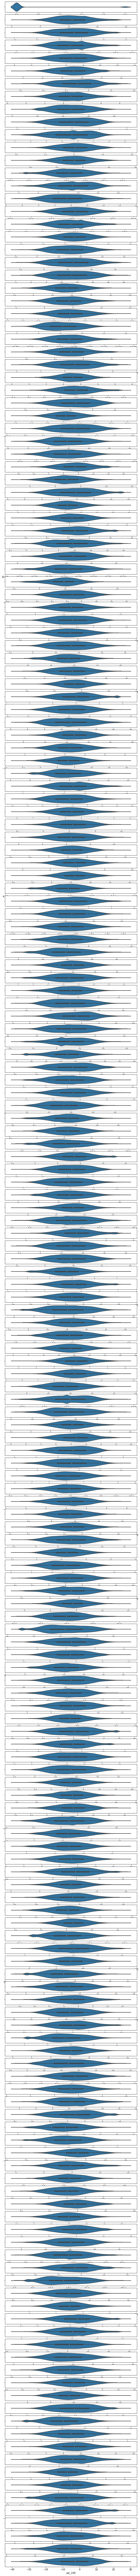

In [11]:
#Візуалізуємо дані
fig, axes = plt.subplots(nrows=len(train_set.columns), ncols=1)
fig.set_size_inches(10, 200)
for i, col in enumerate(features):    
    sns.violinplot(train_set[col],  ax=axes[i])
plt.show()

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resul

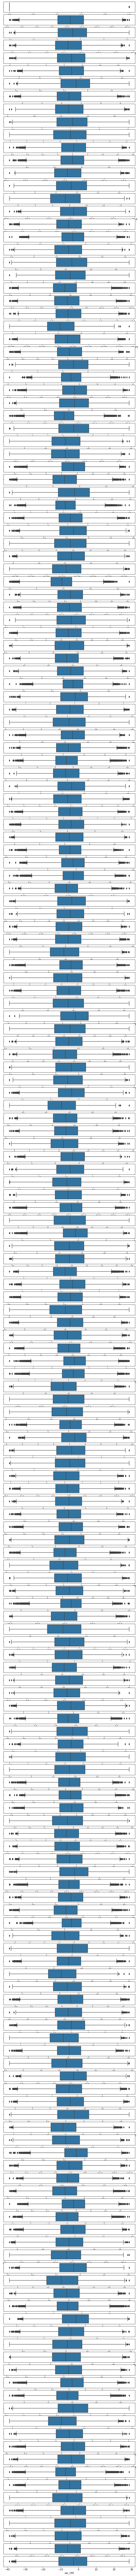

In [12]:
#Візуалізуємо дані
fig, axes = plt.subplots(nrows=len(train_set.columns), ncols=1)
fig.set_size_inches(10, 200)
for i, col in enumerate(train_set.columns):    
    sns.boxplot(train_set[col],  ax=axes[i])
plt.show()

<AxesSubplot:>

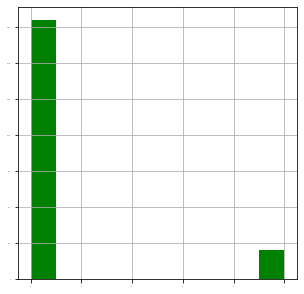

In [13]:
#Візуалізуємо дані
train_set['target'].hist(figsize=(5,5),color = 'g',xlabelsize=0,ylabelsize=0)

In [14]:
def build_correlation_matrix(train_set):    
    corrMatt = train_set.corr()
    mask = np.array(corrMatt)
    mask[np.tril_indices_from(mask)] = False
    fig,ax= plt.subplots()
    fig.set_size_inches(90,90)
    sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)
    return corrMatt

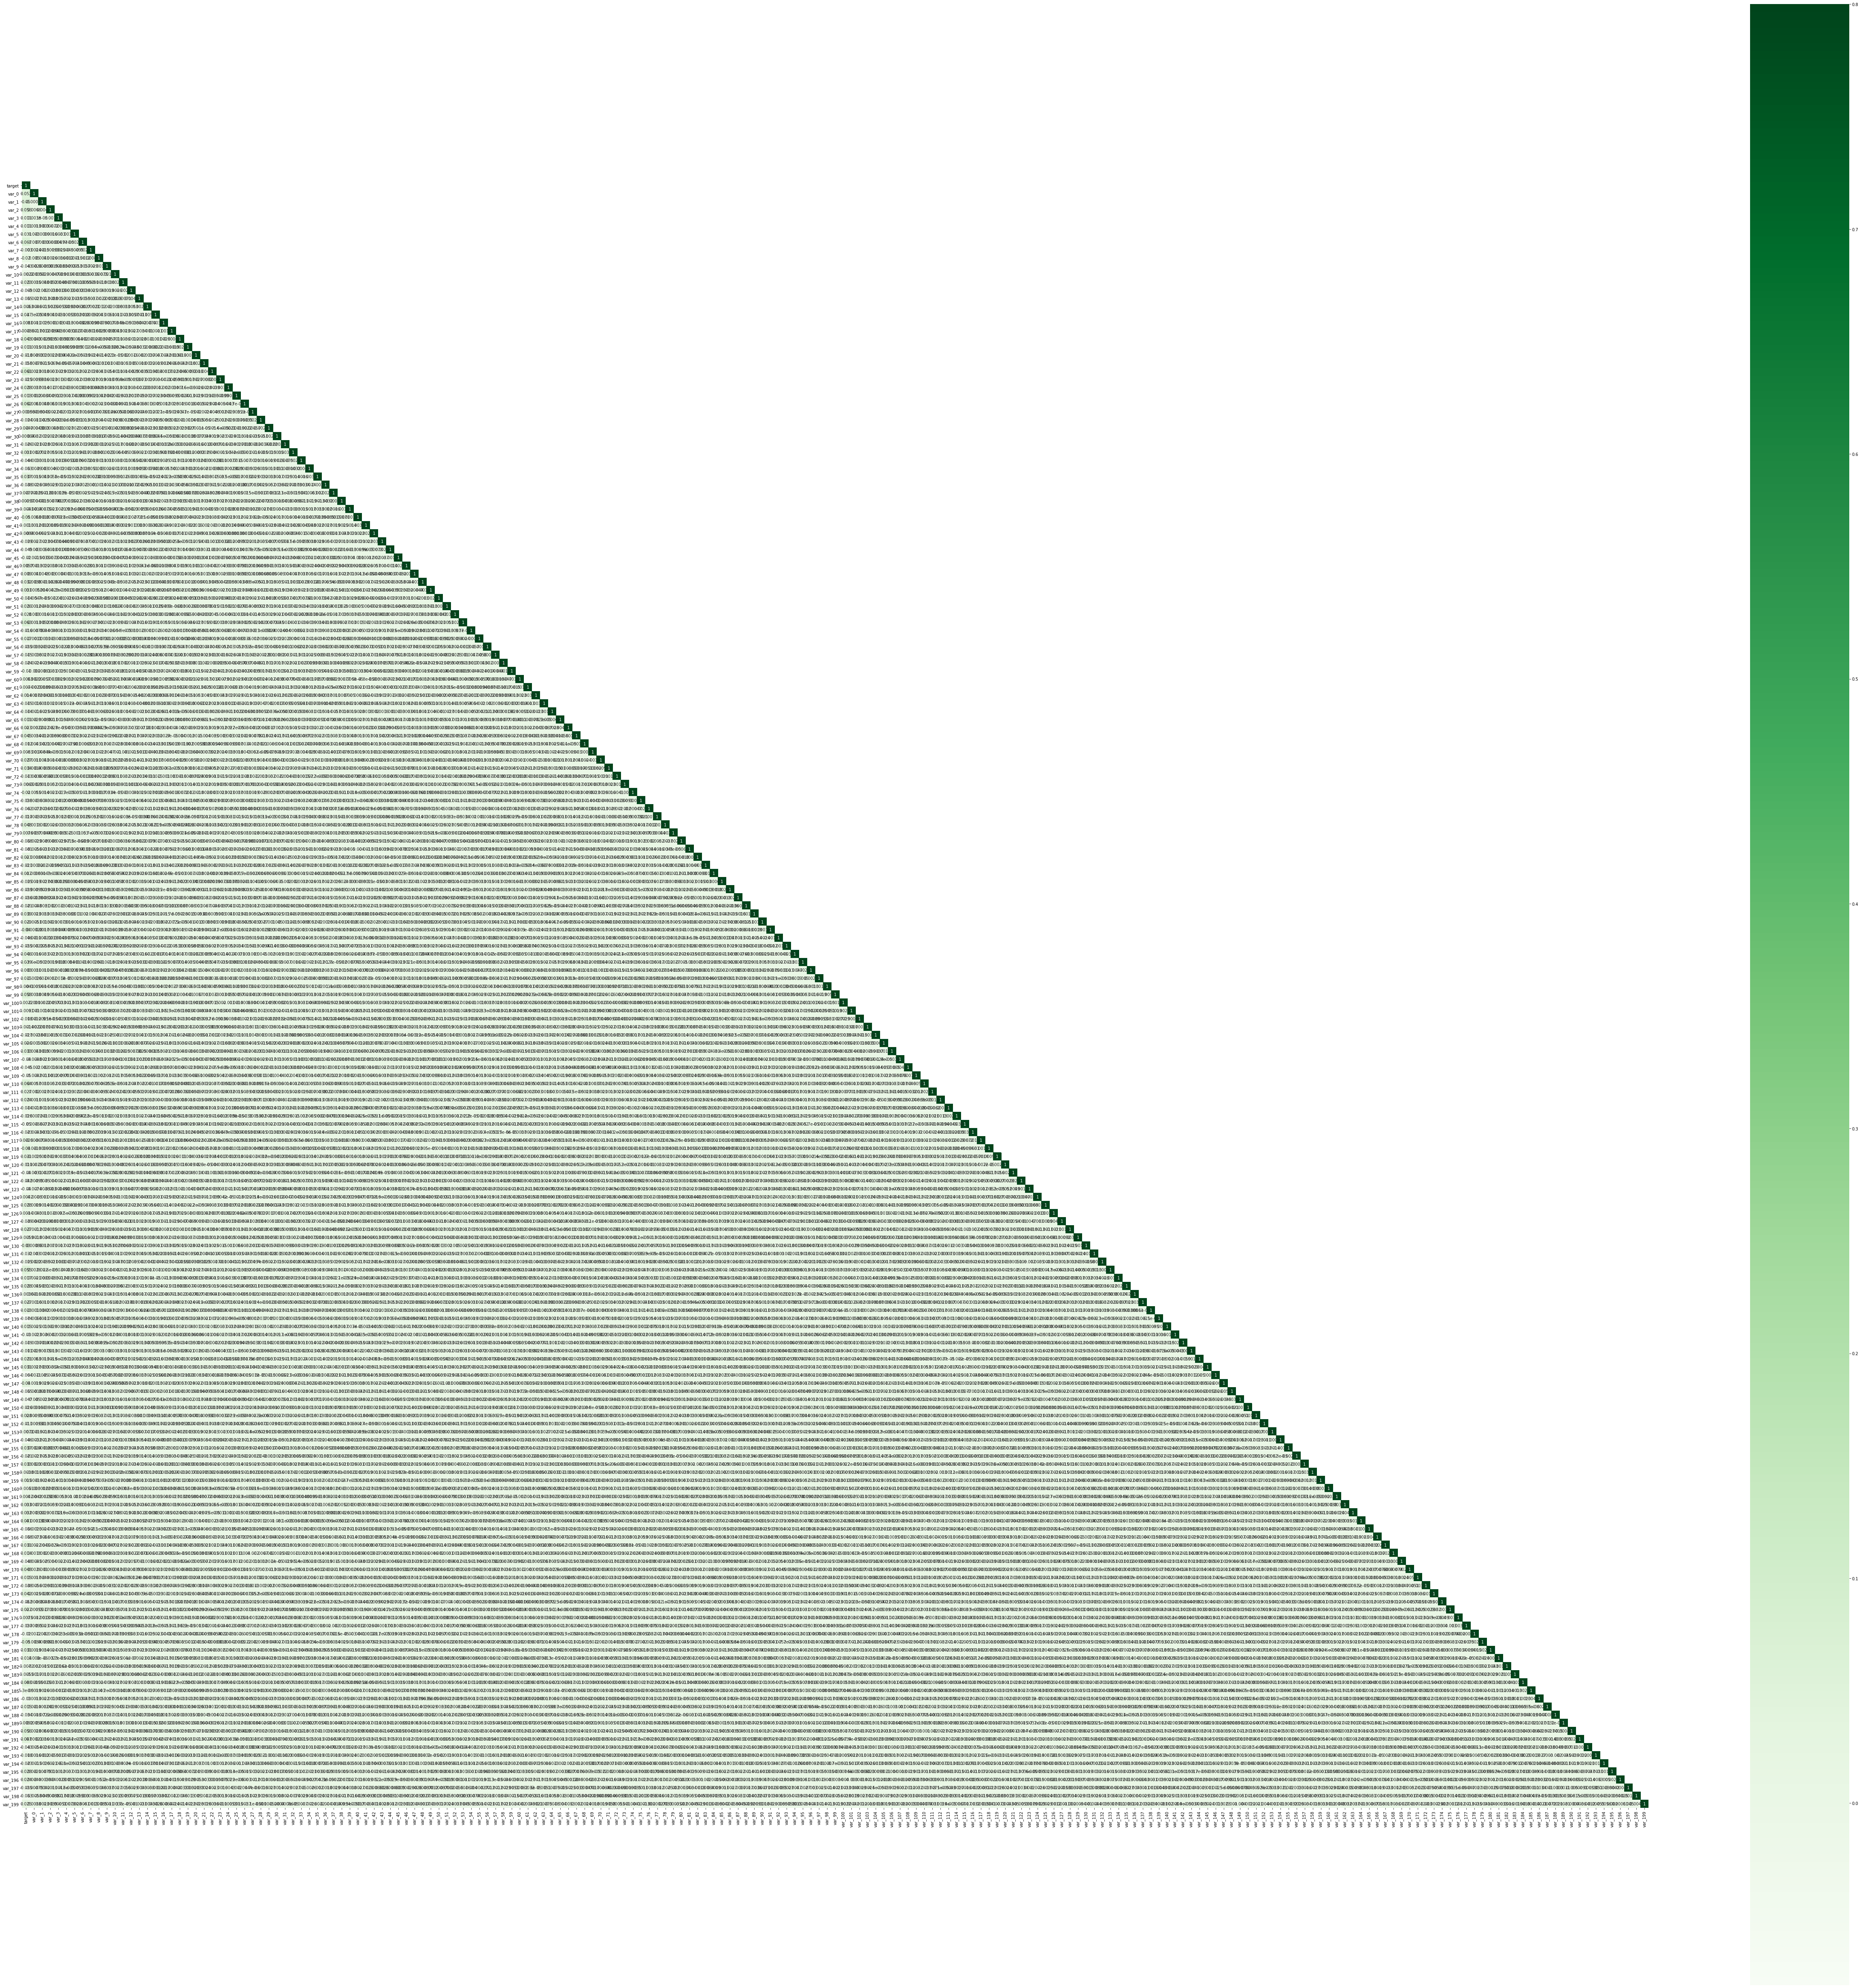

In [15]:
corr_matrix_num = build_correlation_matrix(train_set)

In [16]:
def finding_col_corr_over(train_set1, corr_matrix, corr):
    train_set = pd.DataFrame(train_set1)
    high_correlation_set = set()
    counter = 0
    df_columns = list(train_set)
    print("Deleting second columns")
    for i in range(len(corr_matrix)):
        for j in range(i + 1, len(corr_matrix)):
            if corr_matrix[df_columns[i]][df_columns[j]] > corr:
#                 print(df_train_numerical_columns[i], ' ', df_train_numerical_columns[j], ' correlation ',  corrMatt[df_train_numerical_columns[i]][df_train_numerical_columns[j]])
                print(df_columns[i], '\t ', df_columns[j], '\t correlation ',  corr_matrix[df_columns[i]][df_columns[j]])

                high_correlation_set.add(df_columns[j])
                counter = counter + 1

    return high_correlation_set

In [17]:
def deleting_col_by_corr(train_set,high_correlation_set):
    for feature in high_correlation_set:
        train_set.drop(feature, axis='columns', inplace=True)
    print("Now train_set shape is",train_set.shape)
    return train_set

In [18]:
###Визначаємо в яких колонках велика коряляція  та видаляємо непотрібні колонки

high_correlation_set =  finding_col_corr_over(train_set, corr_matrix_num, 0.8)
train_set = deleting_col_by_corr(train_set,high_correlation_set)
test_set = deleting_col_by_corr(test_set,high_correlation_set)

Deleting second columns
Now train_set shape is (200000, 201)
Now train_set shape is (200000, 200)


In [19]:
high_correlation_set

set()

In [21]:
def delete_outliers(df,z):
    temp_size = df.shape[0]
    First_size = temp_size
    print(temp_size)
    for i, col in enumerate(df.columns):
        df['z_score']=stats.zscore(df[col])
        df = df.loc[df['z_score'].abs()<=z]
        df.drop('z_score', axis='columns', inplace=True)
        print(i,df.shape, "\t-",temp_size-df.shape[0],"rows")
        temp_size = df.shape[0]
    print('Dataframe size:',First_size,'->',First_size)
    print('Deleted', 100*temp_size/First_size,'% of dataframe ')
    return df

In [22]:
train_set = delete_outliers(train_set,3)

200000
0 (200000, 201) 	- 0 rows
1 (199977, 201) 	- 23 rows
2 (199968, 201) 	- 9 rows
3 (199960, 201) 	- 8 rows
4 (199938, 201) 	- 22 rows
5 (199878, 201) 	- 60 rows
6 (199872, 201) 	- 6 rows
7 (199833, 201) 	- 39 rows
8 (199813, 201) 	- 20 rows
9 (199806, 201) 	- 7 rows
10 (199806, 201) 	- 0 rows
11 (199731, 201) 	- 75 rows
12 (199617, 201) 	- 114 rows
13 (199600, 201) 	- 17 rows
14 (199599, 201) 	- 1 rows
15 (199595, 201) 	- 4 rows
16 (199575, 201) 	- 20 rows
17 (199553, 201) 	- 22 rows
18 (199441, 201) 	- 112 rows
19 (199429, 201) 	- 12 rows
20 (199427, 201) 	- 2 rows
21 (199425, 201) 	- 2 rows
22 (199310, 201) 	- 115 rows
23 (199171, 201) 	- 139 rows
24 (199111, 201) 	- 60 rows
25 (199104, 201) 	- 7 rows
26 (199042, 201) 	- 62 rows
27 (199002, 201) 	- 40 rows
28 (198997, 201) 	- 5 rows
29 (198902, 201) 	- 95 rows
30 (198863, 201) 	- 39 rows
31 (198846, 201) 	- 17 rows
32 (198593, 201) 	- 253 rows
33 (198589, 201) 	- 4 rows
34 (198580, 201) 	- 9 rows
35 (198570, 201) 	- 10 rows
36 (

In [23]:
train_set.shape[0]

188963

In [24]:
#робимо розбиття тренувального файлу
train_target = train_set['target']
train_set.drop('target', axis='columns', inplace=True)
train_x,test_x,train_y,test_y = train_test_split(train_set, train_target,test_size=0.2)

#Робимо стандартизацію
sc = StandardScaler()
scaled_train_x = sc.fit_transform(train_x)
scaled_test_x = sc.transform(test_x)

#Навчаємо модель
lg = LogisticRegression()
lg.fit(scaled_train_x, train_y)

#Випробовуємо модель
train_preds = lg.predict_proba(scaled_train_x)
test_preds = lg.predict_proba(scaled_test_x)
train_preds = train_preds[:, 1]
test_preds = test_preds[: , 1]

#Виводимо Результи навчання
print(f"Train ROC_AUC: {roc_auc_score(train_y, train_preds)}")
print(f"Test ROC_AUC: {roc_auc_score(test_y, test_preds)}")

Train ROC_AUC: 0.8608834071849543
Test ROC_AUC: 0.8615698841952768


In [25]:
#Робимо стандартизацію для test_set
sub_x = sc.transform(test_set)

last_result = lg.predict_proba(sub_x)
last_result = last_result[: , 1]

#Записуємо результати в файл
my_submission = pd.DataFrame({'ID_code' : ID_code_test, 'target' : last_result})
my_submission.to_csv('my_submission.csv', index = False)

In [26]:
my_submission.head()

ID_code    target
0  test_0  0.198434
1  test_1  0.232627
2  test_2  0.047659
3  test_3  0.201209
4  test_4  0.059746

In [27]:
my_submission.describe()

target
count  200000.000000
mean        0.094900
std         0.140268
min         0.000027
25%         0.014165
50%         0.039809
75%         0.110211
max         0.995825